In [1]:
#We explore the reasons that may influence negative split

In [ ]:
#import
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
#load data
df = pd.read_csv('marathon_results_2016.csv')

In [4]:
#change time string to minites
def time_to_min(string):
    if string is not '-':
        time_segments = string.split(':')
        hours = int(time_segments[0])
        mins = int(time_segments[1])
        sec = int(time_segments[2])
        time = hours*60 + mins + np.true_divide(sec,60)
        return time
    else:
        return -1

Text(0.5,1,'Split Distribution (Negative split when < 1)')

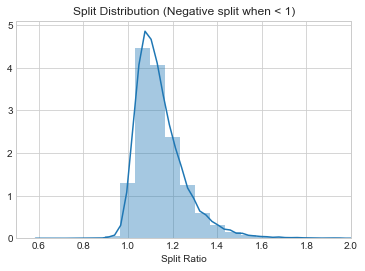

In [5]:
'''
Plot the split ratio distribution. 
That is, the time ratio between the first and a second half of the race. 
A value smaller than 1 implies a negative split - i.e, the 2nd part of the race was faster than the first one. 
And inversely, a value which is larger than 1 indicates the more intuitive (and evidently more common) positive 
split. We only care about the meaning of horizontal axis and ignore vertical axis.

As we can see, most of the runners chose (or were compelled to choose, limited by the constraints their body 
imposes upon them) a positive split. They run the 2nd half slower than the first half. for most of them, 
however, the difference is small and they are able to maintain a relatively constant pace. There's a long tail
on the right of runners who slowed down significantly. On the left we can see a small minority of runners who 
did in fact run a negative split.

'''
df['Half_min'] = df['Half'].apply(lambda x: time_to_min(x))
df['Full_min'] = df['Official Time'].apply(lambda x: time_to_min(x))
df['split_ratio'] = (df['Full_min'] - df['Half_min'])/(df['Half_min'])
df_split = df[df.Half_min > 0]
sns.distplot(df_split.split_ratio)
plt.xlim([0.5,2])
plt.xlabel('Split Ratio')
plt.title('Split Distribution (Negative split when < 1)')


In [6]:
#Now let's see whether the split strategy or performance depends on any demographic features.

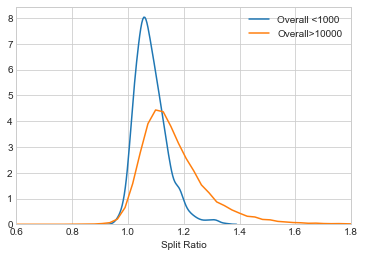

In [7]:
'''
Overall Rank correlates with the splits:
The better runners have a more negative (or less positive, to be more accurate) than worse runners.
'''
sns.kdeplot(df_split.split_ratio[df_split.Overall < 1000])
sns.kdeplot(df_split.split_ratio[df_split.Overall > 10000])
plt.legend(['Overall <1000','Overall>10000'])
plt.xlim([0.6,1.8])
plt.xlabel('Split Ratio')
plt.savefig("Split and Rank.png")

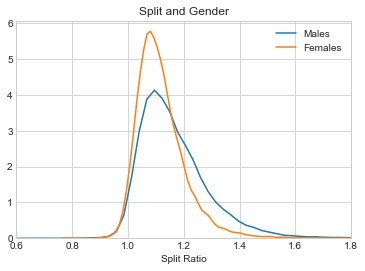

In [8]:
'''
males vs females:
The Average is very close, but the longer tail of the males distribution skews it to the right.
'''
sns.kdeplot(df_split.split_ratio[df_split['M/F'] == 'M'])
sns.kdeplot(df_split.split_ratio[df_split['M/F'] == 'F'])
plt.legend(['Males','Females'])
plt.xlim([0.6,1.8])
plt.title('Split and Gender')
plt.xlabel('Split Ratio')
plt.savefig("Split and Gender.png",dpi = 500)

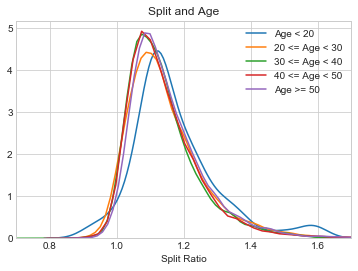

In [9]:
'''
Split changes with age:
We can see these five distributions virtually overlap.
So we can quite conclusively say that the split rate is not age dependent.
'''
sns.kdeplot(df_split.split_ratio[df_split.Age < 20])
sns.kdeplot(df_split.split_ratio[(df_split.Age>=20)&(df_split.Age<30)])
sns.kdeplot(df_split.split_ratio[(df_split.Age>=30)&(df_split.Age<40)])
sns.kdeplot(df_split.split_ratio[(df_split.Age>=40)&(df_split.Age<50)])
sns.kdeplot(df_split.split_ratio[df_split.Age >= 50])
plt.xlim([0.7,1.7])
plt.legend(['Age < 20', '20 <= Age < 30','30 <= Age < 40','40 <= Age < 50','Age >= 50'])
plt.xlabel('Split Ratio')
plt.title('Split and Age')
plt.savefig("Split and Age.png",dpi = 500)